In [1]:
import pandas as pd
import numpy as np

In [2]:
#data from GridironAI
df = pd.read_csv('NFL_Data_2000_2019.csv').iloc[:, 1:]
df.head()

,player_id,tm,pos,player,season,week,NFL_draft_year,NFL_draft_round,NFL_draft_rank,height_inches,...,receiving_td,receiving_rec,receiving_tar,rushing_att,rushing_td,rushing_yds,fumbles_lost,half_ppr_fantasy_points,ppr_fantasy_points,standard_fantasy_points
0,2755,NYG,WR,Rueben Randle,2014,9,2012.0,2.0,63.0,74.0,...,0.0,4.0,11.0,0.0,0.0,0.0,0.0,6.9,8.9,4.9
1,2755,NYG,WR,Rueben Randle,2014,10,2012.0,2.0,63.0,74.0,...,0.0,5.0,10.0,0.0,0.0,0.0,0.0,6.4,8.9,3.9
2,2755,NYG,WR,Rueben Randle,2014,11,2012.0,2.0,63.0,74.0,...,0.0,7.0,15.0,0.0,0.0,0.0,0.0,14.7,18.2,11.2
3,2755,NYG,WR,Rueben Randle,2014,12,2012.0,2.0,63.0,74.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,5.1,6.6,3.6
4,2755,NYG,WR,Rueben Randle,2014,13,2012.0,2.0,63.0,74.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,6.7,8.2,5.2


In [3]:
df.shape

(124222, 37)

In [4]:
df.columns

Index(['player_id', 'tm', 'pos', 'player', 'season', 'week', 'NFL_draft_year',
       'NFL_draft_round', 'NFL_draft_rank', 'height_inches', 'weight_pounds',
       'forty_yd', 'three_cone', 'bench', 'broad_jump', 'combine_height',
       'shuttle', 'vertical', 'offensive_snapcount',
       'offensive_snapcount_percentage', 'passing_int', 'passing_rating',
       'passing_yds', 'passing_two_pt_md', 'passing_td', 'passing_att',
       'receiving_yds', 'receiving_td', 'receiving_rec', 'receiving_tar',
       'rushing_att', 'rushing_td', 'rushing_yds', 'fumbles_lost',
       'half_ppr_fantasy_points', 'ppr_fantasy_points',
       'standard_fantasy_points'],
      dtype='object')

In [5]:
df = df.groupby(['player_id', 'tm', 'player', 'pos', 'season'], as_index=False)\
    .agg({
    'offensive_snapcount': np.sum,
    'offensive_snapcount_percentage': np.mean,
    'passing_rating': np.mean,
    'passing_yds': np.sum,
    'passing_td': np.sum,
    'passing_att': np.sum,
    'receiving_yds': np.sum,
    'receiving_td': np.sum,
    'receiving_rec': np.sum,
    'receiving_tar': np.sum,
    'rushing_att': np.sum,
    'standard_fantasy_points': np.sum,
    'ppr_fantasy_points': np.sum,
    'half_ppr_fantasy_points': np.sum
})

df.head()

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
0,2,CHI,Justin Gage,WR,2003,0.0,NaN,0.0,0.0,0.0,0.0,338.0,2.0,17.0,35.0,0.0,45.8,62.8,54.3
1,2,CHI,Justin Gage,WR,2004,0.0,NaN,0.0,0.0,0.0,0.0,156.0,0.0,12.0,28.0,0.0,15.6,27.6,21.6
2,2,CHI,Justin Gage,WR,2005,0.0,NaN,0.0,0.0,0.0,0.0,346.0,2.0,31.0,55.0,0.0,46.6,77.6,62.1
3,2,CHI,Justin Gage,WR,2006,0.0,NaN,0.0,0.0,0.0,0.0,68.0,0.0,4.0,8.0,0.0,6.8,10.8,8.8
4,2,OTI,Justin Gage,WR,2007,0.0,NaN,0.0,0.0,0.0,0.0,750.0,2.0,55.0,85.0,0.0,87.0,142.0,114.5


In [6]:
df.loc[df['player'] == 'Nate Washington']

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
18,8,HTX,Nate Washington,WR,2015,793.0,76.428571,0.0,0.0,0.0,0.0,658.0,4.0,47.0,94.0,0.0,89.8,136.8,113.3
19,8,OTI,Nate Washington,WR,2009,0.0,NaN,0.0,0.0,0.0,0.0,569.0,6.0,47.0,95.0,2.0,94.4,141.4,117.9
20,8,OTI,Nate Washington,WR,2010,0.0,NaN,0.0,0.0,0.0,0.0,687.0,6.0,42.0,94.0,1.0,103.9,145.9,124.9
21,8,OTI,Nate Washington,WR,2011,0.0,NaN,0.0,0.0,0.0,0.0,1023.0,7.0,74.0,121.0,2.0,150.8,224.8,187.8
22,8,OTI,Nate Washington,WR,2012,789.0,78.125000,0.0,0.0,0.0,0.0,746.0,4.0,46.0,89.0,0.0,98.6,144.6,121.6
23,8,OTI,Nate Washington,WR,2013,887.0,82.500000,0.0,0.0,0.0,0.0,919.0,3.0,58.0,105.0,0.0,109.9,167.9,138.9
24,8,OTI,Nate Washington,WR,2014,767.0,78.437500,0.0,0.0,0.0,0.0,647.0,2.0,40.0,72.0,0.0,76.7,116.7,96.7
25,8,PIT,Nate Washington,WR,2005,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26,8,PIT,Nate Washington,WR,2006,0.0,NaN,0.0,0.0,0.0,0.0,624.0,4.0,35.0,69.0,3.0,87.2,122.2,104.7
27,8,PIT,Nate Washington,WR,2007,0.0,NaN,0.0,0.0,0.0,0.0,450.0,5.0,29.0,55.0,1.0,75.0,104.0,89.5


In [7]:
#only keeping 2012 (when snapcounts started)
df = df.loc[(df['season'] >= 2012)]
df.shape

(4786, 19)

In [8]:
df = df.sort_values(['player', 'season'])
df.head()

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
596,230,MIA,\nMatt Moore\n,QB,2012,55.0,45.00,24.15,131.0,1.0,19.0,0.0,0.0,0.0,0.0,5.0,8.94,8.94,8.94
597,230,MIA,\nMatt Moore\n,QB,2013,6.0,11.00,27.10,53.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,-1.88,-1.88,-1.88
598,230,MIA,\nMatt Moore\n,QB,2014,30.0,20.50,32.80,21.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.64,0.64,0.64
599,230,MIA,\nMatt Moore\n,QB,2015,7.0,11.00,118.70,14.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.36,0.36,0.36
600,230,MIA,\nMatt Moore\n,QB,2016,190.0,80.75,79.60,721.0,8.0,87.0,0.0,0.0,0.0,0.0,1.0,54.74,54.74,54.74


In [9]:
df.loc[df['player'] == 'Nate Washington']

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
22,8,OTI,Nate Washington,WR,2012,789.0,78.125000,0.0,0.0,0.0,0.0,746.0,4.0,46.0,89.0,0.0,98.6,144.6,121.6
23,8,OTI,Nate Washington,WR,2013,887.0,82.500000,0.0,0.0,0.0,0.0,919.0,3.0,58.0,105.0,0.0,109.9,167.9,138.9
24,8,OTI,Nate Washington,WR,2014,767.0,78.437500,0.0,0.0,0.0,0.0,647.0,2.0,40.0,72.0,0.0,76.7,116.7,96.7
18,8,HTX,Nate Washington,WR,2015,793.0,76.428571,0.0,0.0,0.0,0.0,658.0,4.0,47.0,94.0,0.0,89.8,136.8,113.3


In [10]:
lag_features = ['rushing_att', 
                'receiving_tar', 
                'offensive_snapcount', 
                'offensive_snapcount_percentage',
                'ppr_fantasy_points',
                'passing_rating',
                'passing_att', 
                'passing_td']

for lag in range(1, 6):

    shifted = df.groupby('player_id').shift(lag)
    
    for column in lag_features:
 
        df[f'lag_{column}_{lag}'] = shifted[column]

In [11]:
df = df.fillna(-1)

In [12]:
df.head(10)

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,...,lag_passing_att_4,lag_passing_td_4,lag_rushing_att_5,lag_receiving_tar_5,lag_offensive_snapcount_5,lag_offensive_snapcount_percentage_5,lag_ppr_fantasy_points_5,lag_passing_rating_5,lag_passing_att_5,lag_passing_td_5
596,230,MIA,\nMatt Moore\n,QB,2012,55.0,45.000000,24.150000,131.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
597,230,MIA,\nMatt Moore\n,QB,2013,6.0,11.000000,27.100000,53.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
598,230,MIA,\nMatt Moore\n,QB,2014,30.0,20.500000,32.800000,21.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
599,230,MIA,\nMatt Moore\n,QB,2015,7.0,11.000000,118.700000,14.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
600,230,MIA,\nMatt Moore\n,QB,2016,190.0,80.750000,79.600000,721.0,8.0,...,19.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
601,230,MIA,\nMatt Moore\n,QB,2017,203.0,77.750000,81.675000,861.0,4.0,...,6.0,0.0,5.0,0.0,55.0,45.0,8.94,24.15,19.0,1.0
594,230,KAN,\nMatt Moore\n,QB,2019,170.0,47.166667,56.616667,659.0,4.0,...,4.0,0.0,0.0,0.0,6.0,11.0,-1.88,27.10,6.0,0.0
11439,27100,OTI,A.J. Brown,WR,2019,678.0,68.875000,0.000000,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
7209,4267,DEN,A.J. Derby,TE,2016,188.0,46.333333,0.000000,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0
7213,4267,NWE,A.J. Derby,TE,2016,35.0,12.250000,0.000000,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0


In [13]:
df.corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).head(20)

,ppr_fantasy_points
ppr_fantasy_points,1.000000
half_ppr_fantasy_points,0.993836
standard_fantasy_points,0.969913
offensive_snapcount,0.892725
offensive_snapcount_percentage,0.780541
receiving_rec,0.705915
receiving_tar,0.684079
receiving_yds,0.679074
lag_ppr_fantasy_points_1,0.620368
receiving_td,0.603843


In [14]:
df.corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).tail(10)

,ppr_fantasy_points
lag_offensive_snapcount_5,0.150394
lag_passing_att_5,0.147602
lag_offensive_snapcount_percentage_5,0.143828
lag_passing_rating_5,0.136849
lag_rushing_att_3,0.116509
lag_receiving_tar_5,0.094123
lag_rushing_att_4,0.064195
lag_rushing_att_5,0.040106
season,-0.011656
player_id,-0.164576


In [15]:
df.loc[df['pos'] == 'WR'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).head(20)

,ppr_fantasy_points
ppr_fantasy_points,1.000000
half_ppr_fantasy_points,0.999249
standard_fantasy_points,0.995272
receiving_yds,0.989402
receiving_rec,0.982602
receiving_tar,0.975496
offensive_snapcount,0.920471
receiving_td,0.899715
offensive_snapcount_percentage,0.825539
lag_ppr_fantasy_points_1,0.634288


In [16]:
df.loc[df['pos'] == 'RB'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).head(20)

,ppr_fantasy_points
ppr_fantasy_points,1.000000
half_ppr_fantasy_points,0.998173
standard_fantasy_points,0.990941
offensive_snapcount,0.921137
rushing_att,0.915577
receiving_tar,0.873783
receiving_rec,0.869801
receiving_yds,0.859607
offensive_snapcount_percentage,0.826742
receiving_td,0.637106


In [17]:
df.loc[df['pos'] == 'TE'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).head(20)

,ppr_fantasy_points
ppr_fantasy_points,1.000000
half_ppr_fantasy_points,0.999088
standard_fantasy_points,0.993973
receiving_yds,0.987261
receiving_rec,0.982418
receiving_tar,0.979359
receiving_td,0.879536
offensive_snapcount,0.866248
offensive_snapcount_percentage,0.806111
lag_ppr_fantasy_points_1,0.626261


In [18]:
df.loc[df['pos'] == 'QB'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False).head(20)

,ppr_fantasy_points
ppr_fantasy_points,1.000000
half_ppr_fantasy_points,0.999880
standard_fantasy_points,0.999521
passing_yds,0.969756
passing_td,0.968133
offensive_snapcount,0.966091
passing_att,0.952159
rushing_att,0.760098
offensive_snapcount_percentage,0.747275
lag_ppr_fantasy_points_1,0.641295


In [19]:
pear_corr=df.corr(method='pearson')
pear_corr

,player_id,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,...,lag_passing_att_4,lag_passing_td_4,lag_rushing_att_5,lag_receiving_tar_5,lag_offensive_snapcount_5,lag_offensive_snapcount_percentage_5,lag_ppr_fantasy_points_5,lag_passing_rating_5,lag_passing_att_5,lag_passing_td_5
player_id,1.000000,0.408560,-0.188642,-0.189104,-0.085235,-0.078883,-0.077448,-0.077860,-0.123441,-0.101053,...,-0.071390,-0.082538,-0.057871,-0.084063,-0.109774,-0.114267,-0.105156,-0.065869,-0.059539,-0.068103
season,0.408560,1.000000,-0.021772,0.010775,-0.001014,-0.004227,-0.002601,-0.005738,-0.011145,-0.007257,...,0.128871,0.159857,0.134138,0.227740,0.278147,0.294850,0.258738,0.147129,0.127227,0.151789
offensive_snapcount,-0.188642,-0.021772,1.000000,0.876983,0.287210,0.451859,0.443566,0.450053,0.691146,0.598797,...,0.176410,0.185914,0.003929,0.111735,0.164033,0.157191,0.158968,0.124526,0.136739,0.146112
offensive_snapcount_percentage,-0.189104,0.010775,0.876983,1.000000,0.413880,0.449632,0.427754,0.453977,0.582887,0.501939,...,0.208281,0.212151,0.021312,0.134135,0.197933,0.196183,0.195275,0.169079,0.167224,0.176617
passing_rating,-0.085235,-0.001014,0.287210,0.413880,1.000000,0.824858,0.796794,0.827209,-0.215697,-0.176790,...,0.451917,0.432726,0.043909,-0.063193,0.147556,0.156975,0.152079,0.366131,0.351037,0.343482
passing_yds,-0.078883,-0.004227,0.451859,0.449632,0.824858,1.000000,0.974294,0.995463,-0.172767,-0.140618,...,0.462614,0.457395,0.049232,-0.052652,0.161560,0.158198,0.168177,0.348671,0.359361,0.357656
passing_td,-0.077448,-0.002601,0.443566,0.427754,0.796794,0.974294,1.000000,0.960283,-0.160666,-0.130712,...,0.449895,0.450609,0.053086,-0.047833,0.163863,0.158670,0.171586,0.342742,0.353947,0.355390
passing_att,-0.077860,-0.005738,0.450053,0.453977,0.827209,0.995463,0.960283,1.000000,-0.176143,-0.143383,...,0.455389,0.447299,0.048784,-0.053857,0.158856,0.156509,0.164957,0.346981,0.355710,0.353085
receiving_yds,-0.123441,-0.011145,0.691146,0.582887,-0.215697,-0.172767,-0.160666,-0.176143,1.000000,0.851294,...,-0.099017,-0.084350,-0.047463,0.184338,0.084056,0.077640,0.082763,-0.082568,-0.077643,-0.067673
receiving_td,-0.101053,-0.007257,0.598797,0.501939,-0.176790,-0.140618,-0.130712,-0.143383,0.851294,1.000000,...,-0.080119,-0.067732,-0.050748,0.142514,0.061526,0.055487,0.059574,-0.066982,-0.062461,-0.055289


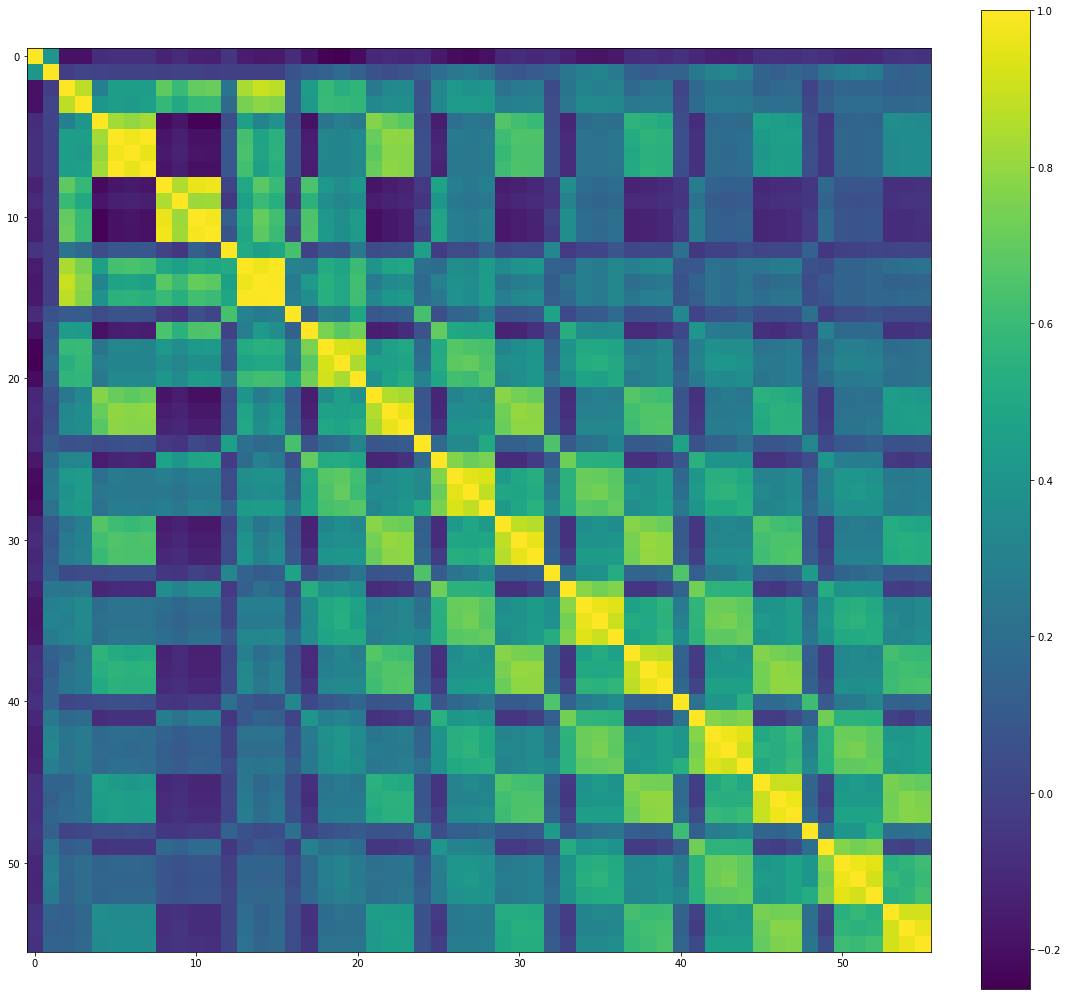

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

C:\Users\Jaden\AppData\Local\Temp/ipykernel_18168/4143157492.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=65, fontsize=15)
C:\Users\Jaden\AppData\Local\Temp/ipykernel_18168/4143157492.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns, rotation=0, fontsize=15)


IndexError: index 56 is out of bounds for axis 1 with size 56

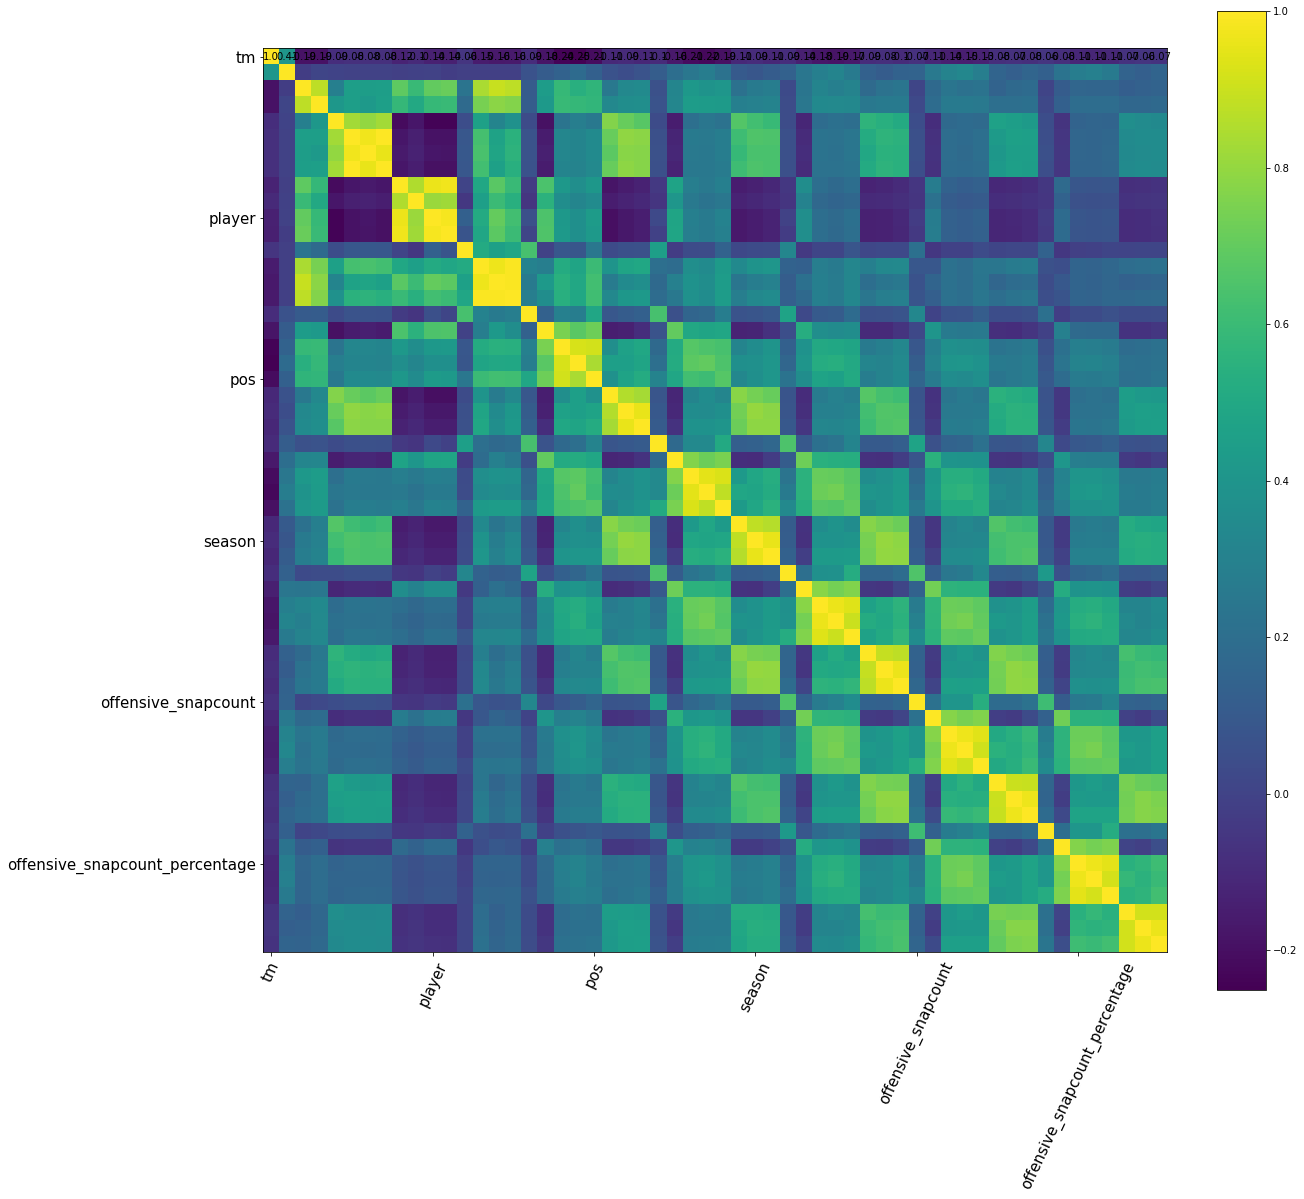

In [24]:
fig, ax = plt.subplots(figsize=(18,18))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(df.columns, rotation=65, fontsize=15)
ax.set_yticklabels(df.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(df.columns)-1):
    for j in range(len(df.columns)-1):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

plt.show()

In [27]:
pear_corr.style.background_gradient(cmap='Greens')

,player_id,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points,lag_rushing_att_1,lag_receiving_tar_1,lag_offensive_snapcount_1,lag_offensive_snapcount_percentage_1,lag_ppr_fantasy_points_1,lag_passing_rating_1,lag_passing_att_1,lag_passing_td_1,lag_rushing_att_2,lag_receiving_tar_2,lag_offensive_snapcount_2,lag_offensive_snapcount_percentage_2,lag_ppr_fantasy_points_2,lag_passing_rating_2,lag_passing_att_2,lag_passing_td_2,lag_rushing_att_3,lag_receiving_tar_3,lag_offensive_snapcount_3,lag_offensive_snapcount_percentage_3,lag_ppr_fantasy_points_3,lag_passing_rating_3,lag_passing_att_3,lag_passing_td_3,lag_rushing_att_4,lag_receiving_tar_4,lag_offensive_snapcount_4,lag_offensive_snapcount_percentage_4,lag_ppr_fantasy_points_4,lag_passing_rating_4,lag_passing_att_4,lag_passing_td_4,lag_rushing_att_5,lag_receiving_tar_5,lag_offensive_snapcount_5,lag_offensive_snapcount_percentage_5,lag_ppr_fantasy_points_5,lag_passing_rating_5,lag_passing_att_5,lag_passing_td_5
player_id,1.000000,0.408560,-0.188642,-0.189104,-0.085235,-0.078883,-0.077448,-0.077860,-0.123441,-0.101053,-0.136319,-0.139620,-0.059612,-0.152701,-0.164576,-0.160409,-0.093697,-0.179856,-0.235862,-0.250334,-0.208006,-0.105831,-0.094105,-0.112282,-0.096631,-0.163212,-0.211163,-0.223884,-0.193585,-0.105314,-0.090755,-0.110556,-0.086143,-0.138622,-0.177010,-0.186484,-0.165198,-0.092692,-0.081471,-0.097559,-0.072864,-0.108975,-0.140812,-0.147060,-0.133083,-0.079696,-0.071390,-0.082538,-0.057871,-0.084063,-0.109774,-0.114267,-0.105156,-0.065869,-0.059539,-0.068103
season,0.408560,1.000000,-0.021772,0.010775,-0.001014,-0.004227,-0.002601,-0.005738,-0.011145,-0.007257,-0.005318,-0.021891,-0.013684,-0.012306,-0.011656,-0.012040,0.062922,0.111130,0.145246,0.188947,0.130854,0.067077,0.045052,0.068284,0.116178,0.199702,0.244690,0.278492,0.221449,0.103106,0.083463,0.112629,0.138430,0.238958,0.290910,0.316223,0.267304,0.137080,0.112888,0.143863,0.145377,0.253187,0.306977,0.327716,0.283372,0.151267,0.128871,0.159857,0.134138,0.227740,0.278147,0.294850,0.258738,0.147129,0.127227,0.151789
offensive_snapcount,-0.188642,-0.021772,1.000000,0.876983,0.287210,0.451859,0.443566,0.450053,0.691146,0.598797,0.701929,0.712462,0.230340,0.841206,0.892725,0.875993,0.107203,0.442926,0.589213,0.538495,0.569268,0.248898,0.331008,0.348197,0.060377,0.317529,0.415574,0.391269,0.408244,0.216721,0.261683,0.281667,0.031849,0.237891,0.315952,0.291337,0.308952,0.183176,0.221290,0.233987,0.009771,0.174942,0.236386,0.216647,0.227253,0.148701,0.176410,0.185914,0.003929,0.111735,0.164033,0.157191,0.158968,0.124526,0.136739,0.146112
offensive_snapcount_percentage,-0.189104,0.010775,0.876983,1.000000,0.413880,0.449632,0.427754,0.453977,0.582887,0.501939,0.586739,0.599397,0.183662,0.744771,0.780541,0.770135,0.112095,0.428246,0.590013,0.583653,0.570995,0.334590,0.364179,0.366902,0.070546,0.324175,0.440363,0.436913,0.430404,0.289807,0.299178,0.306503,0.042482,0.247795,0.342356,0.336090,0.335537,0.251326,0.258634,0.265472,0.024712,0.189303,0.264601,0.261085,0.255266,0.206963,0.208281,0.212151,0.021312,0.134135,0.197933,0.196183,0.195275,0.169079,0.167224,0.176617
passing_rating,-0.085235,-0.001014,0.287210,0.413880,1.000000,0.824858,0.796794,0.827209,-0.215697,-0.176790,-0.237083,-0.238606,0.044994,0.461477,0.313380,0.383181,0.037068,-0.192538,0.230787,0.283727,0.250671,0.768581,0.710900,0.673250,0.036977,-0.152076,0.206849,0.239748,0.221240,0.664958,0.619744,0.590967,0.039516,-0.118035,0.189700,0.213261,0.199390,0.561591,0.536044,0.513844,0.044028,-0.087566,0.175311,0.188067,0.181011,0.466018,0.451917,0.432726,0.043909,-0.063193,0.147556,0.156975,0.152079,0.366131,0.351037,0.343482
passing_yds,-0.078883,-0.004227,0.451859,0.449632,0.824858,1.000000,0.974294,0.995463,-0.172767,-0.140618,-0.189563,-0.190551,0.090460,0.632346,0.467768,

In [30]:
df.season.max()

2019

In [31]:
#creating a dataframe of WR with snapcounts above 50 (gets rid of players that don't really contribute)
wr_df = df.loc[(df['pos'] == 'WR') & (df['lag_offensive_snapcount_1'] > 50)]

In [32]:
wr_df.shape

(1002, 59)

In [33]:
#same for RBs
rb_df = df.loc[(df['pos'] == 'RB') & (df['lag_offensive_snapcount_1'] > 50)]

In [34]:
rb_df.shape

(710, 59)

In [203]:
X_wr = wr_df[[
    'lag_receiving_tar_1', 'lag_offensive_snapcount_1', 'lag_ppr_fantasy_points_1', 'lag_offensive_snapcount_percentage_1'
]].values

y_wr = wr_df['ppr_fantasy_points'].values

In [204]:
X_wr.shape, y_wr.shape

((1002, 4), (1002,))

In [40]:
X_rb = rb_df[[
    'lag_receiving_tar_1', 'lag_offensive_snapcount_1', 'lag_ppr_fantasy_points_1', 'lag_offensive_snapcount_percentage_1', 'lag_rushing_att_1'
]].values

y_rb = rb_df['ppr_fantasy_points'].values

In [41]:
X_rb.shape, y_rb.shape

((710, 5), (710,))

In [215]:
#WR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_wr, y_wr, test_size=0.2, random_state=10)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_pred, y_test)

TypeError: Singleton array array(StandardScaler(), dtype=object) cannot be considered a valid collection.

In [43]:
#RB
X_train, X_test, y_train, y_test = train_test_split(X_rb, y_rb, test_size=0.2, random_state=10)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mean_absolute_error(y_pred, y_test)

55.47605308620165

In [192]:
testdf = pd.read_csv('FantasyPros_Fantasy_Football_2021_Offense_Snap_Count_Percentages.csv')
testdf.tail()

,Player,Pos,Team,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,TTL,AVG
631,Nathan Cottrell,RB,JAC,0%,0%,0%,0%,0%,0%,bye,...,0%,0%,0%,0%,0%,1%,0%,0%,1.0,1%
632,Miller Forristall,TE,CLE,0%,0%,0%,0%,0%,0%,0%,...,0%,0%,bye,0%,2%,0%,0%,0%,1.0,2%
633,Nick Ralston,RB,DAL,0%,0%,1%,0%,0%,0%,bye,...,0%,0%,0%,0%,0%,0%,0%,0%,1.0,1%
634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
testwr = testdf.loc[(testdf['Pos'] == 'WR')][['Player','Pos', 'TTL', 'AVG']]
testwr.tail()

,Player,Pos,TTL,AVG
621,Daurice Fountain,WR,2.0,3%
625,John Hightower,WR,2.0,4%
626,Maurice Ffrench,WR,2.0,3%
629,Cody Thompson,WR,1.0,2%
630,Nsimba Webster,WR,1.0,1%


In [191]:

testwr = testwr.sort_values(by='Player')
testwr.tail()

,Player,Pos,TTL,AVG
577,Vyncint Smith,WR,11.0,17%
462,William Fuller V,WR,65.0,48%
502,Willie Snead IV,WR,41.0,9%
55,Zach Pascal,WR,872.0,84%
127,Zay Jones,WR,614.0,60%


In [172]:
testwr.shape

(250, 4)

In [200]:
statswr = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_WR.csv').iloc[:10]

In [201]:
statswr = statswr[['Player', 'TGT', 'FPTS', 'TTL', 'AVG']]
statswr.head()

,Player,TGT,FPTS,TTL,AVG
0,Cooper Kupp,191,439.5,1024.0,94.0
1,Davante Adams,169,344.3,886.0,85.0
2,Deebo Samuel,121,339.0,829.0,80.0
3,Justin Jefferson,167,330.4,1014.0,89.0
4,Ja'Marr Chase,128,304.6,939.0,85.0


In [206]:
statswr['predicted_2022'] = lr.predict(statswr[['TGT', 'FPTS', 'TTL', 'AVG']].values)

In [209]:
statswr.head(10)

,Player,TGT,FPTS,TTL,AVG,predicted_2022
0,Cooper Kupp,191,439.5,1024.0,94.0,773.489436
1,Davante Adams,169,344.3,886.0,85.0,675.121717
2,Deebo Samuel,121,339.0,829.0,80.0,628.505105
3,Justin Jefferson,167,330.4,1014.0,89.0,767.093911
4,Ja'Marr Chase,128,304.6,939.0,85.0,710.420235
5,Tyreek Hill,159,296.5,867.0,73.0,656.326211
6,Stefon Diggs,164,285.5,977.0,82.0,739.240061
7,Diontae Johnson,169,274.4,988.0,91.0,753.298537
8,Mike Evans,114,262.5,915.0,82.0,692.882276
9,Hunter Renfrow,128,259.1,758.0,66.0,575.520614


In [223]:
dff = pd.DataFrame({'Player': ['Cooper Kupp', 'Justin Jefferson','Davante Adams','Deebo Samuel',"Ja'Marr Chase",'Tyreek Hill','Stefon Diggs','Diontae Johnson','Mike Evans', 'Hunter Renfrow'], '2022 Projections': [267.68, 253.45, 239.55, 238.43, 233.13, 232.76, 220.14,215.62,210.23,207.94]})

In [224]:
dff

,Player,2022 Projections
0,Cooper Kupp,267.68
1,Justin Jefferson,253.45
2,Davante Adams,239.55
3,Deebo Samuel,238.43
4,Ja'Marr Chase,233.13
5,Tyreek Hill,232.76
6,Stefon Diggs,220.14
7,Diontae Johnson,215.62
8,Mike Evans,210.23
9,Hunter Renfrow,207.94
